## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# check the version of matplot
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

## Importing dataframe

In [4]:
path = r'C:\Users\User\Documents\Medical cost personal'

In [5]:
df =  pd.read_pickle(r'C:\Users\User\Documents\Medical cost personal\Prepared Data\df_clean.pkl')

## Exploring the data

In [6]:
df.shape

(1337, 8)

In [7]:
df.columns

Index(['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'Price category'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of       Age     sex     BMI  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     Price category  
0        High price  
1        High price  
2        High price  
3        High price  
4        High pri

In [9]:
df.dtypes

Age                 int64
sex                object
BMI               float64
children            int64
smoker             object
region             object
charges           float64
Price category     object
dtype: object

In [10]:
# Columns to include in the sample dataset
columns =['Age','BMI', 'children','charges']

In [11]:
df_new = df[columns]

### The elbow technique

In [12]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 
# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Creates a score that represents 
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] 
# a rate of variation for the given cluster option.
score

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

[-195939158682.99286,
 -47969960260.4719,
 -22951588701.3057,
 -12118189115.397703,
 -8535631071.070277,
 -6164546464.63328,
 -4432161520.767482,
 -3493642480.7095485,
 -2775691635.6217666]

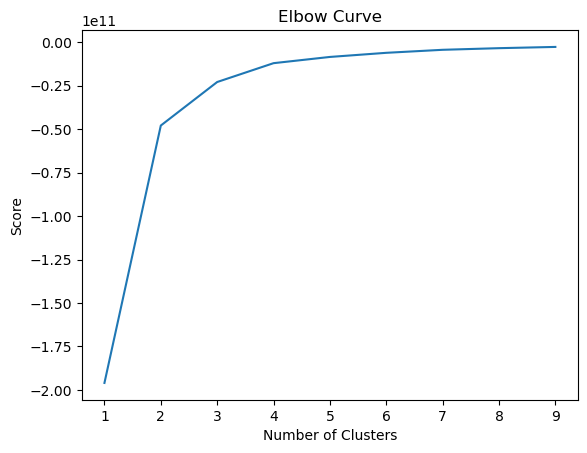

In [14]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The graphic depicts a data set's elbow curve, with the x-axis denoting clusters and the y-axis representing the WCSS(within-cluster sum of squares) score. The curve begins in the upper left corner and descends to the lower right corner. It exhibits an elbow-like bend and flattens out at 3 clusters, indicating that 3 is the ideal number of clusters for this data set. The table displays three groups of data points with varying mean and median values for age, BMI, and charges.

### k-means clustering

In [15]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3,n_init=10) 

In [16]:
# Fit the k-means object to the data.
kmeans.fit(df_new)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [17]:
df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_17700\316427919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = kmeans.fit_predict(df_new)


In [18]:
df_new.head()

,Age,BMI,children,charges,clusters
0,19,27.900,0,16884.92400,2
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,2
4,32,28.880,0,3866.85520,0


In [19]:
df_new['clusters'].value_counts()

0    869
2    306
1    162
Name: clusters, dtype: int64

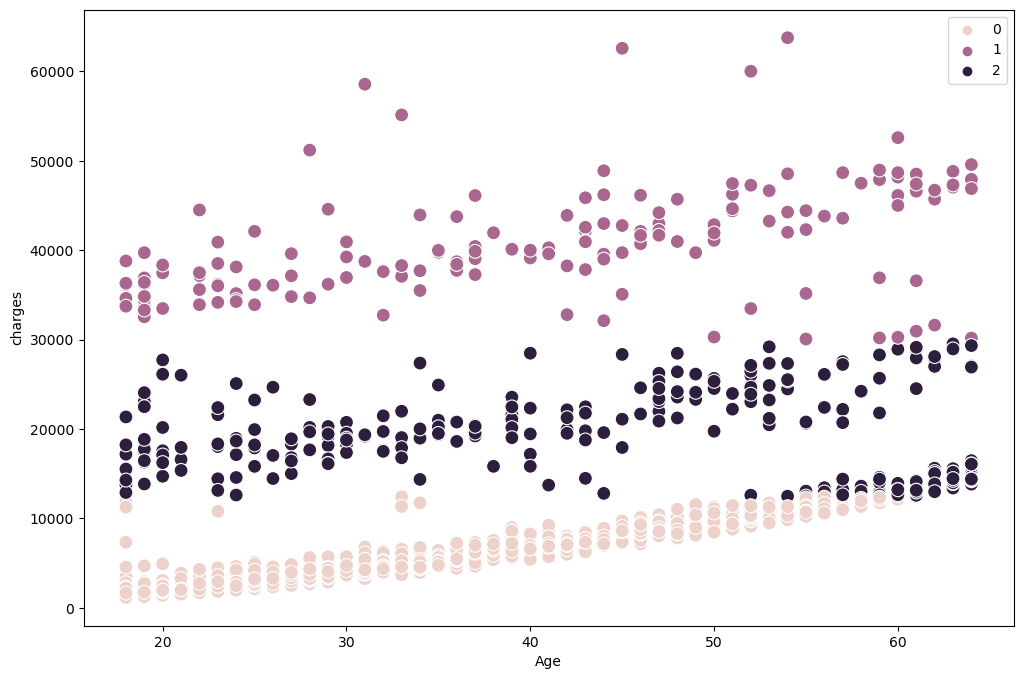

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Age'], y=df_new['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show()

In [22]:
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\User\AppData\Local\Temp\ipykernel_17700\4047022447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'


In [31]:
df_new['clusters'].value_counts(dropna = False)

0    869
2    306
1    162
Name: clusters, dtype: int64

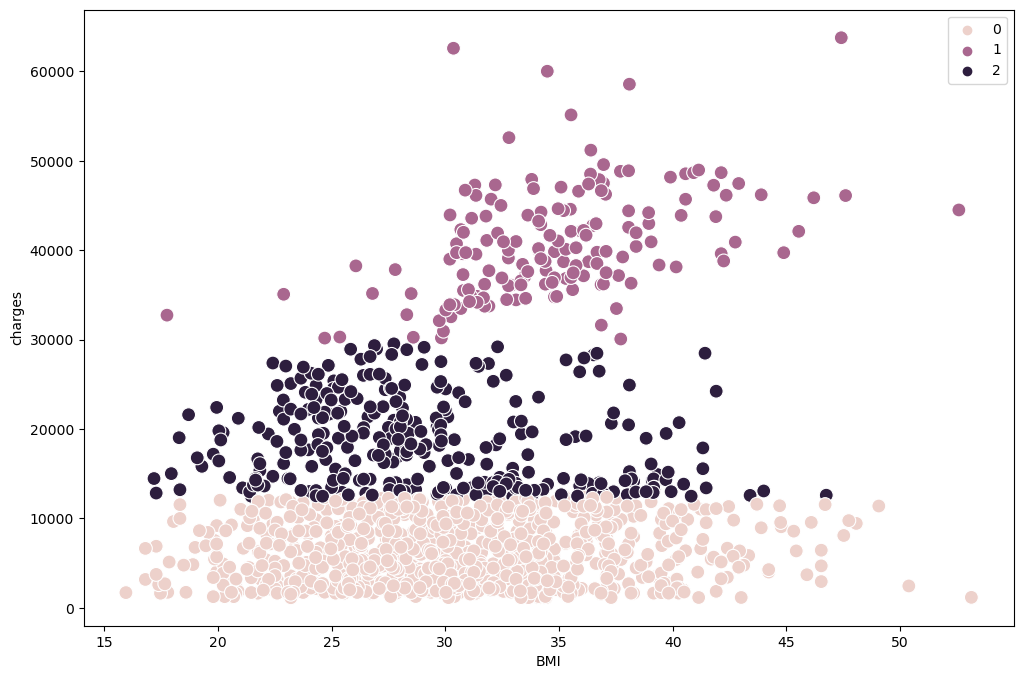

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['BMI'], y=df_new['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('BMI') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show()

In [24]:
print(df.columns)

Index(['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'Price category'],
      dtype='object')


In [26]:
df_new.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'BMI':['mean', 'median'], 
                         'charges':['mean', 'median']})

Age               BMI               charges             
                  mean median       mean  median          mean       median
cluster                                                                    
dark purple  45.604575   49.0  29.091454  28.025  18525.649167  17916.91521
pink         36.759494   37.0  30.437388  30.115   6308.405980   6117.49450
purple       40.376543   42.0  34.845432  34.650  40761.308558  39854.11165

The analysis demonstrates that BMI and medical charges are positively correlated across the clusters, but the strength of the correlation varies based on the clusters' age and BMI characteristics. The presence of other factors impacting this relationship highlights the complexity of healthcare cost determinants. Further research is needed to fully understand the role of these factors and their implications for health policy and practice. Additionally, medical coverage variations among the clusters may play a crucial role in shaping healthcare access and costs, particularly as age influences coverage availability.

In [33]:
df_new.to_csv(os.path.join(path, 'Prepared Data', 'df_new_clean.csv'))